In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from numpy import mean
from numpy import std
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from yellowbrick.model_selection import validation_curve 
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
data=pd.read_csv("wineQuality_processed.csv")
data_temp=data
X=data.drop(['quality'],axis=1)
y=data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)
X_train_33, X_test_33, y_train_33, y_test_33 = train_test_split(X, y, test_size=0.33, random_state=30)
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(X, y, test_size=0.20, random_state=30)

In [4]:
#Function to get the test report for each model
def test_report(model,test_size):
    if test_size==0.25:
        prediction=model.predict(X_test)
        return(classification_report(y_test,prediction))
    if test_size==0.20:
        prediction=model.predict(X_test_20)
        return(classification_report(y_test_20,prediction))
    if test_size==0.33:
        prediction=model.predict(X_test_33)
        return(classification_report(y_test_33,prediction))
def train_report(model,test_size):
    if test_size==0.25:
        prediction=model.predict(X_train)
        return(classification_report(y_train,prediction))
    if test_size==0.20:
        prediction=model.predict(X_train_20)
        return(classification_report(y_train_20,prediction))
    if test_size==0.33:
        prediction=model.predict(X_train_33)
        return(classification_report(y_train_33,prediction))
#Function to get the f1-score,precision
def f_p_r(model,test_size,name):
    global reps
    if test_size==0.20:
        predicts_20=model.predict(X_test_20)
        reps=classification_report(y_test_20,predicts_20,output_dict=True)
        f1=reps['macro avg']['f1-score']
        precs=reps['macro avg']['precision']
        recal=reps['macro avg']['recall']
        print("With test_size=0.20 for ",name," Recall:",recal)
        print("With test_size=0.20 for ",name," f1 score:",f1)
        print("With test_size=0.20 for ",name," precision:",precs)
    if test_size==0.25:
        predicts=model.predict(X_test)
        reps=classification_report(y_test,predicts,output_dict=True)
        f1=reps['macro avg']['f1-score']
        precs=reps['macro avg']['precision']
        recal=reps['macro avg']['recall']
        print("With test_size=0.25 for ",name," Recall:",recal)
        print("With test_size=0.25 for ",name," f1 score:",f1)
        print("With test_size=0.25 for ",name," precision:",precs)
    if test_size==0.33:
        predicts_33=model.predict(X_test_33)
        reps=classification_report(y_test_33,predicts_33,output_dict=True)
        f1=reps['macro avg']['f1-score']
        precs=reps['macro avg']['precision']
        recal=reps['macro avg']['recall']
        print("With test_size=0.33 for ",name," Recall:",recal)
        print("With test_size=0.33 for ",name," f1 score:",f1)
        print("With test_size=0.33 for ",name," precision:",precs)
#Function to get the confusion matrix
def confuse_mat(model,test_size):
    if test_size==0.20:
        prediction=model.predict(X_test_20)
        conmat=confusion_matrix(y_test_20,prediction)
        cf_matrix=pd.DataFrame(data=conmat,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
        sns.heatmap(cf_matrix, annot=True,fmt='d')
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.show()
    if test_size==0.25:
        prediction=model.predict(X_test)
        conmat=confusion_matrix(y_test,prediction)
        cf_matrix=pd.DataFrame(data=conmat,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
        sns.heatmap(cf_matrix, annot=True,fmt='d')
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.show()
    if test_size==0.33:
        prediction=model.predict(X_test_33)
        conmat=confusion_matrix(y_test_33,prediction)
        cf_matrix=pd.DataFrame(data=conmat,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
        sns.heatmap(cf_matrix, annot=True,fmt='d')
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.show()
#Function to plot the R0C curve
def roc_auc(model,name,test_size):
    if test_size==0.20:
        ns_probs = [0 for _ in range(len(y_test_20))]
        prediction_probs_20=model.predict_proba(X_test_20)
        prediction_probs_20 = prediction_probs_20[:, 1]
        ns_auc = roc_auc_score(y_test_20, ns_probs)
        lr_auc=roc_auc_score(y_test_20,prediction_probs_20)
        ns_fpr, ns_tpr, _ = roc_curve(y_test_20, ns_probs)
        fpr,tpr,thresholds=roc_curve(y_test_20,prediction_probs_20)
        plt.plot(ns_fpr, ns_tpr,linestyle='--',label='No Skill')
        plt.plot(fpr,tpr,marker='.',label=name)
        plt.xlim([0.0,1.0])
        plt.ylim([0.0,1.0])
        plt.title('ROC curve ', fontsize = 10)
        plt.xlabel('False Positive Rate',fontsize = 10)
        plt.ylabel('True Positive Rate',fontsize = 10)
        plt.show()
        print('No Skill: ROC AUC=%.3f' % (ns_auc))
        print(name,': ROC AUC=%.3f' % (lr_auc))
    if test_size==0.25:
        ns_probs = [0 for _ in range(len(y_test))]
        prediction_probs=model.predict_proba(X_test)
        prediction_probs = prediction_probs[:, 1]
        ns_auc = roc_auc_score(y_test, ns_probs)
        lr_auc=roc_auc_score(y_test,prediction_probs)
        ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
        fpr,tpr,thresholds=roc_curve(y_test,prediction_probs)
        plt.plot(ns_fpr, ns_tpr,linestyle='--',label='No Skill')
        plt.plot(fpr,tpr,marker='.',label=name)
        plt.xlim([0.0,1.0])
        plt.ylim([0.0,1.0])
        plt.title('ROC curve ', fontsize = 10)
        plt.xlabel('False Positive Rate',fontsize = 10)
        plt.ylabel('True Positive Rate',fontsize = 10)
        plt.show()
        print('No Skill: ROC AUC=%.3f' % (ns_auc))
        print(name,': ROC AUC=%.3f' % (lr_auc))
    if test_size==0.33:
        ns_probs = [0 for _ in range(len(y_test_33))]
        prediction_probs_33=model.predict_proba(X_test_33)
        prediction_probs_33 = prediction_probs_33[:, 1]
        ns_auc = roc_auc_score(y_test_33, ns_probs)
        lr_auc=roc_auc_score(y_test_33,prediction_probs_33)
        ns_fpr, ns_tpr, _ = roc_curve(y_test_33, ns_probs)
        fpr,tpr,thresholds=roc_curve(y_test_33,prediction_probs_33)
        plt.plot(ns_fpr, ns_tpr,linestyle='--',label='No Skill')
        plt.plot(fpr,tpr,marker='.',label=name)
        plt.xlim([0.0,1.0])
        plt.ylim([0.0,1.0])
        plt.title('ROC curve ', fontsize = 10)
        plt.xlabel('False Positive Rate',fontsize = 10)
        plt.ylabel('True Positive Rate',fontsize = 10)
        plt.show()
        print('No Skill: ROC AUC=%.3f' % (ns_auc))
        print(name,': ROC AUC=%.3f' % (lr_auc))

In [6]:
#Support Vector Machine
svm_model=SVC()
c_vals=[0.01,0.1,1,10]
kernels=['linear','sigmoid','rbf','poly']
poly_degree=[2,3]
gamma_vals=[0.001,0.01,0.1]
max_iterations=[1000,2000]
randomness=[10,100]
probs=True
svm_grid = dict(gamma=gamma_vals,kernel=kernels,C=c_vals,degree=poly_degree,max_iter=max_iterations,random_state=randomness)
svmClf_20=GridSearchCV(svm_model,param_grid=svm_grid,cv=10)
svmClf_20.fit(X_train_20,y_train_20)
print("SVM Model working with test size=0.20")
print("-------------------------------------------")
params_combine_svm_20=pd.concat([pd.DataFrame(svmClf_20.cv_results_["params"]),pd.DataFrame(svmClf_20.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
print(params_combine_svm_20)
print("-------------------------------------------")
print("Best parameter setting with test size=0.20: ",svmClf_20.best_params_)
print("Best accuracy score with test size=0.20: ",svmClf_20.best_score_)
print("--------------------------------------------------------------------------------------")
svmClf_25=GridSearchCV(svm_model,param_grid=svm_grid,cv=10)
svmClf_25.fit(X_train,y_train)
print("SVM Model working with test size=0.25:")
print("-------------------------------------------")
params_combine_svm_25=pd.concat([pd.DataFrame(svmClf_25.cv_results_["params"]),pd.DataFrame(svmClf_25.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
print(params_combine_svm_25)
print("-------------------------------------------")
print("Best parameter setting with test size=0.25: ",svmClf_25.best_params_)
print("Best accuracy score with test size=0.25: ",svmClf_25.best_score_)
print("--------------------------------------------------------------------------------------")
svmClf_33=GridSearchCV(svm_model,param_grid=svm_grid,cv=10)
svmClf_33.fit(X_train_33,y_train_33)
print("SVM Model working with test size=0.33")
print("-------------------------------------------")
params_combine_svm_33=pd.concat([pd.DataFrame(svmClf_33.cv_results_["params"]),pd.DataFrame(svmClf_33.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
print(params_combine_svm_33)
print("-------------------------------------------")
print("Best parameter setting with test size=0.33: ",svmClf_33.best_params_)
print("Best accuracy score with test size=0.33: ",svmClf_33.best_score_)
print("--------------------------------------------------------------------------------------")

SVM Model working with test size=0.20
-------------------------------------------
         C  degree  gamma   kernel  max_iter  random_state  Accuracy
0     0.01       2  0.001   linear      1000            10  0.650954
1     0.01       2  0.001   linear      1000           100  0.650954
2     0.01       2  0.001   linear      2000            10  0.631134
3     0.01       2  0.001   linear      2000           100  0.631134
4     0.01       2  0.001  sigmoid      1000            10  0.653454
..     ...     ...    ...      ...       ...           ...       ...
379  10.00       3  0.100      rbf      2000           100  0.750249
380  10.00       3  0.100     poly      1000            10  0.634020
381  10.00       3  0.100     poly      1000           100  0.634020
382  10.00       3  0.100     poly      2000            10  0.705799
383  10.00       3  0.100     poly      2000           100  0.705799

[384 rows x 7 columns]
-------------------------------------------
Best parameter setting

Best SVM Model working with test size=0.20
------------------------------------------------------------------
Confusion matrix for SVM with the best parameter settings with test size=0.20


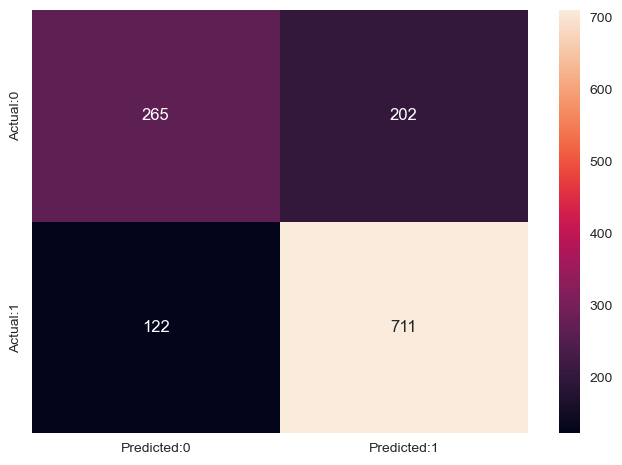

------------------------------------------------------------------
Classification Report for SVM model with Test with test size=0.20
              precision    recall  f1-score   support

           0       0.68      0.57      0.62       467
           1       0.78      0.85      0.81       833

    accuracy                           0.75      1300
   macro avg       0.73      0.71      0.72      1300
weighted avg       0.74      0.75      0.74      1300

------------------------------------------------------------------
Classification Report for SVM model with Train with test size=0.20
              precision    recall  f1-score   support

           0       0.71      0.56      0.62      1917
           1       0.77      0.87      0.82      3280

    accuracy                           0.75      5197
   macro avg       0.74      0.71      0.72      5197
weighted avg       0.75      0.75      0.74      5197

-------------------------------------------------------------------------------

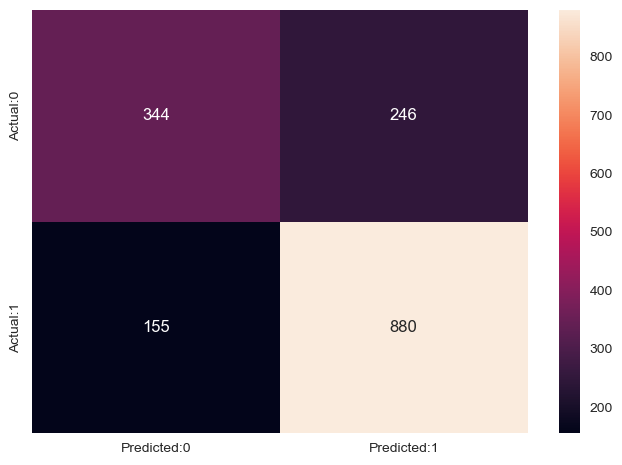

------------------------------------------------------------------
Classification Report for SVM model with Test with test size=0.25
              precision    recall  f1-score   support

           0       0.69      0.58      0.63       590
           1       0.78      0.85      0.81      1035

    accuracy                           0.75      1625
   macro avg       0.74      0.72      0.72      1625
weighted avg       0.75      0.75      0.75      1625

------------------------------------------------------------------
Classification Report for SVM model with Train with test size=0.25
              precision    recall  f1-score   support

           0       0.71      0.56      0.62      1794
           1       0.77      0.87      0.82      3078

    accuracy                           0.75      4872
   macro avg       0.74      0.71      0.72      4872
weighted avg       0.75      0.75      0.75      4872

-------------------------------------------------------------------------------

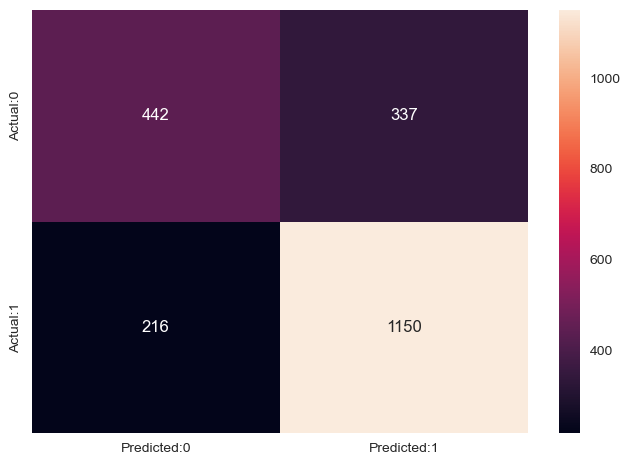

------------------------------------------------------------------
Classification Report for SVM model with Test with test size=0.33
              precision    recall  f1-score   support

           0       0.67      0.57      0.62       779
           1       0.77      0.84      0.81      1366

    accuracy                           0.74      2145
   macro avg       0.72      0.70      0.71      2145
weighted avg       0.74      0.74      0.74      2145

------------------------------------------------------------------
Classification Report for SVM model with Train with test size=0.33
              precision    recall  f1-score   support

           0       0.71      0.57      0.63      1605
           1       0.78      0.86      0.82      2747

    accuracy                           0.76      4352
   macro avg       0.74      0.72      0.73      4352
weighted avg       0.75      0.76      0.75      4352

-------------------------------------------------------------------------------

In [7]:
#Now using the best parameter setting to run SVM
best_svm_20=SVC(C=10,degree=2,gamma=0.1,kernel='rbf',max_iter=2000,random_state=10,probability=True)
svm_20=best_svm_20.fit(X_train_20,y_train_20)
print("Best SVM Model working with test size=0.20")
print("------------------------------------------------------------------")
print("Confusion matrix for SVM with the best parameter settings with test size=0.20")
confuse_mat(svm_20,0.20)
print("------------------------------------------------------------------")
print("Classification Report for SVM model with Test with test size=0.20")
report=test_report(svm_20,0.20)
print(report)
print("------------------------------------------------------------------")
print("Classification Report for SVM model with Train with test size=0.20")
test_repo=train_report(svm_20,0.20)
print(test_repo)
print("--------------------------------------------------------------------------------------")
best_svm_25=SVC(C=10,degree=2,gamma=0.1,kernel='rbf',max_iter=2000,random_state=10,probability=True)
svm_25=best_svm_25.fit(X_train,y_train)
print("Best SVM Model working with test size=0.25")
print("------------------------------------------------------------------")
print("Confusion matrix for SVM with the best parameter settings with test size=0.25")
confuse_mat(svm_25,0.25)
print("------------------------------------------------------------------")
print("Classification Report for SVM model with Test with test size=0.25")
report=test_report(svm_25,0.25)
print(report)
print("------------------------------------------------------------------")
print("Classification Report for SVM model with Train with test size=0.25")
test_repo=train_report(svm_25,0.25)
print(test_repo)
print("--------------------------------------------------------------------------------------")
best_svm_33=SVC(C=10,degree=2,gamma=0.1,kernel='rbf',max_iter=2000,random_state=10,probability=True)
svm_33=best_svm_33.fit(X_train_33,y_train_33)
print("Best SVM Model working with test size=0.33")
print("------------------------------------------------------------------")
print("Confusion matrix for SVM with the best parameter settings with test size=0.33")
confuse_mat(svm_33,0.33)
print("------------------------------------------------------------------")
print("Classification Report for SVM model with Test with test size=0.33")
report=test_report(svm_33,0.33)
print(report)
print("------------------------------------------------------------------")
print("Classification Report for SVM model with Train with test size=0.33")
test_repo=train_report(svm_33,0.33)
print(test_repo)
print("--------------------------------------------------------------------------------------")

ROC curve and AUC score for test_size=0.20


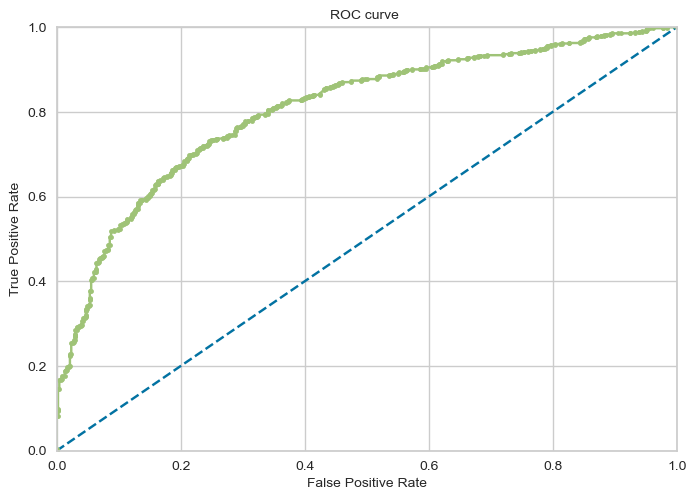

No Skill: ROC AUC=0.500
SVM : ROC AUC=0.806
--------------------------------------------------------------------------------------
ROC curve and AUC score for test_size=0.25


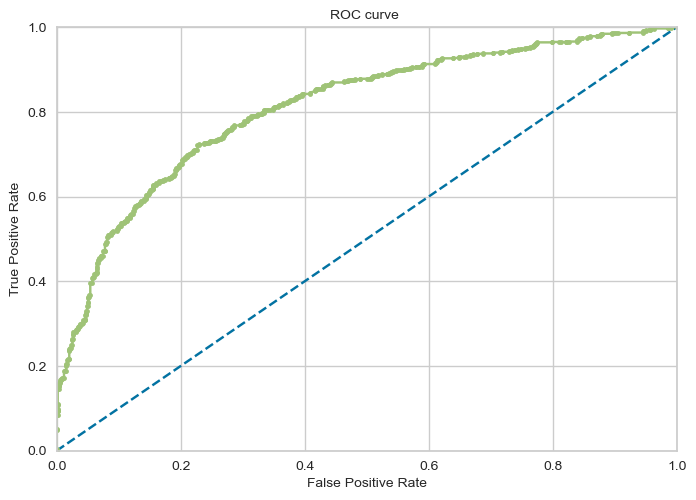

No Skill: ROC AUC=0.500
SVM : ROC AUC=0.811
--------------------------------------------------------------------------------------
ROC curve and AUC score for test_size=0.33


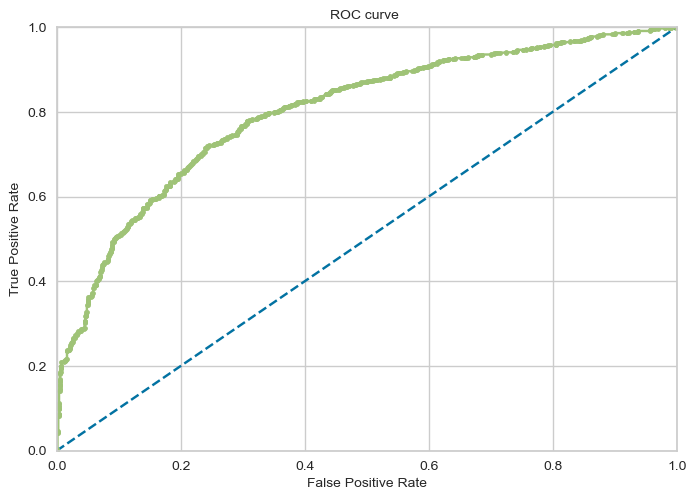

No Skill: ROC AUC=0.500
SVM : ROC AUC=0.800


In [8]:
print("ROC curve and AUC score for test_size=0.20")
roc_auc(svm_20,"SVM",0.20)
print("--------------------------------------------------------------------------------------")
print("ROC curve and AUC score for test_size=0.25")
roc_auc(svm_25,"SVM",0.25)
print("--------------------------------------------------------------------------------------")
print("ROC curve and AUC score for test_size=0.33")
roc_auc(svm_33,"SVM",0.33)

In [9]:
f_p_r(svm_25,0.25,"SVM")

With test_size=0.25 for  SVM  Recall: 0.7166461966756734
With test_size=0.25 for  SVM  f1 score: 0.7231050142160318
With test_size=0.25 for  SVM  precision: 0.7354531442992558
